# Import Library

In [1]:
import pandas as pd
import tensorflow as tf
import re #regex/regular expressions library for remove numbers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #untuk proses padding



# Connect to Drive

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Import Dataset Spotify App Reviews from Kaggle

In [3]:
df = pd.read_csv('/content/drive/MyDrive/pengembangan-ML-dicoding/reviews.csv') #read csv file

telah memenuhi kriteria dataset yang dipakai yakni bersumber dari kaggle

# Data Inspection

In [4]:
df.head() #display top rows

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [5]:
df.tail() #display bottom rows

,Time_submitted,Review,Rating,Total_thumbsup,Reply
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN
61593,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN


In [6]:
df.dtypes #display data types

Time_submitted    object
Review            object
Rating             int64
Total_thumbsup     int64
Reply             object
dtype: object

In [7]:
df.describe() #summary statistics

,Rating,Total_thumbsup
count,61594.000000,61594.000000
mean,3.155989,7.649381
std,1.673285,89.323143
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8195.000000


In [8]:
df.info() #display index, columns and data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [9]:
len(df)

61594

telah memenuhi kriteria dataset yg digunakan yakni minimal 1000 sampel

tipe dataset ini termasuk kategorikal dan multiclass text classification

# Remove Columns and rows not necessarily needed

In [10]:
df_columns_removed = df.drop(columns=['Time_submitted','Total_thumbsup','Reply'])

In [11]:
df_columns_removed.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [12]:
df2 = df_columns_removed.drop(df_columns_removed.index[2000:61594])

In [13]:
df2

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
1995,Sound is. So clear. Easy to use.,4
1996,"So far so good, I am loving the app. It makes ...",5
1997,Finally Spotify have put in lyrics if availabl...,4
1998,Good UI but too much ads. Mostly cringe ads.,4


# One Hot Encoding

In [15]:
category = pd.get_dummies(df2.Rating)
df_cleaned = pd.concat([df2, category], axis=1)
df_cleaned = df_cleaned.drop(columns='Rating')
df_cleaned

,Review,1,2,3,4,5
0,"Great music service, the audio is high quality...",0,0,0,0,1
1,Please ignore previous negative rating. This a...,0,0,0,0,1
2,"This pop-up ""Get the best Spotify experience o...",0,0,0,1,0
3,Really buggy and terrible to use as of recently,1,0,0,0,0
4,Dear Spotify why do I get songs that I didn't ...,1,0,0,0,0
...,...,...,...,...,...,...
1995,Sound is. So clear. Easy to use.,0,0,0,1,0
1996,"So far so good, I am loving the app. It makes ...",0,0,0,0,1
1997,Finally Spotify have put in lyrics if availabl...,0,0,0,1,0
1998,Good UI but too much ads. Mostly cringe ads.,0,0,0,1,0


# Preprocessing

In [24]:
new_review = []
for teks in df_cleaned.Review :
  teks = teks.lower()                               # huruf kecil
  teks = re.sub("(\s|^)?[0-9]+(\s|$)?"," ",teks)    # angka
  teks = re.sub("[^\w\s]"," ",teks)                 # tanda baca
  teks = " ".join(teks.split())                     # spasi berlebih
  new_review.append(teks)

In [25]:
df_cleaned

,Review,1,2,3,4,5
0,"Great music service, the audio is high quality...",0,0,0,0,1
1,Please ignore previous negative rating. This a...,0,0,0,0,1
2,"This pop-up ""Get the best Spotify experience o...",0,0,0,1,0
3,Really buggy and terrible to use as of recently,1,0,0,0,0
4,Dear Spotify why do I get songs that I didn't ...,1,0,0,0,0
...,...,...,...,...,...,...
1995,Sound is. So clear. Easy to use.,0,0,0,1,0
1996,"So far so good, I am loving the app. It makes ...",0,0,0,0,1
1997,Finally Spotify have put in lyrics if availabl...,0,0,0,1,0
1998,Good UI but too much ads. Mostly cringe ads.,0,0,0,1,0


# Convert to Array

In [27]:
#bagi dataset menjadi train dan label
x = df_cleaned['Review'].values
y = df_cleaned[[1,2,3,4,5]].values

# Split Data into Train (80%) and Test (20%)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Tokenizing, Sequencing converted

In [29]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

sekuens_train = tokenizer.texts_to_sequences(x_train)
sekuens_test = tokenizer.texts_to_sequences(x_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

telah memenuhi kriteria: menggunakan fungsi tokenizer

# Build Model using layer embedding, LSTM

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

telah memenuhi kriteria: harus menggunakan LSTM dalam arsitektur model

telah memenuhi kriteria: Harus menggunakan model sequential

telah memenuhi kriteria: Harus menggunakan Embedding




# Callback Implementation

In [31]:
#buat callbacks untuk persingkat waktu pelatihan model
class myCallback(tf.keras.callbacks.Callback) :
  def end_epoch(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      i = logs.get('accuracy')
      self.model.stop_training =True
callbacks = myCallback()

# Train Model

In [32]:
history = model.fit(
  padded_train, y_train, epochs = 30,  callbacks=[callbacks],
  validation_data = (padded_test, y_test), verbose = 2)

Epoch 1/30
50/50 - 8s - loss: 1.4948 - accuracy: 0.3381 - val_loss: 1.3648 - val_accuracy: 0.4750 - 8s/epoch - 151ms/step
Epoch 2/30
50/50 - 2s - loss: 1.3254 - accuracy: 0.4850 - val_loss: 1.2654 - val_accuracy: 0.5525 - 2s/epoch - 45ms/step
Epoch 3/30
50/50 - 2s - loss: 1.1392 - accuracy: 0.5663 - val_loss: 1.1989 - val_accuracy: 0.5950 - 2s/epoch - 45ms/step
Epoch 4/30
50/50 - 2s - loss: 0.9811 - accuracy: 0.6100 - val_loss: 1.1407 - val_accuracy: 0.5975 - 2s/epoch - 46ms/step
Epoch 5/30
50/50 - 2s - loss: 0.8691 - accuracy: 0.6481 - val_loss: 1.1813 - val_accuracy: 0.5775 - 2s/epoch - 46ms/step
Epoch 6/30
50/50 - 4s - loss: 0.7355 - accuracy: 0.7025 - val_loss: 1.2663 - val_accuracy: 0.5400 - 4s/epoch - 82ms/step
Epoch 7/30
50/50 - 3s - loss: 0.6199 - accuracy: 0.7538 - val_loss: 1.4195 - val_accuracy: 0.5525 - 3s/epoch - 54ms/step
Epoch 8/30
50/50 - 2s - loss: 0.5285 - accuracy: 0.7894 - val_loss: 1.5498 - val_accuracy: 0.5375 - 2s/epoch - 44ms/step
Epoch 9/30
50/50 - 2s - loss: 0

telah memenuhi kriteria: Validation set sebesar 20% dari total dataset

telah memenuhi kriteria: Akurasi dari model minimal 75% pada train set dan validation set.

# Plotting

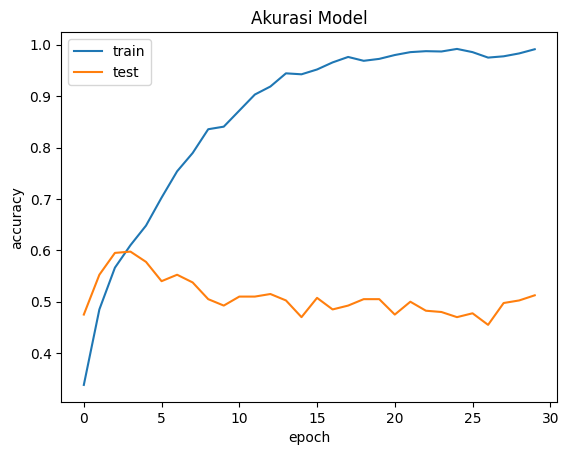

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

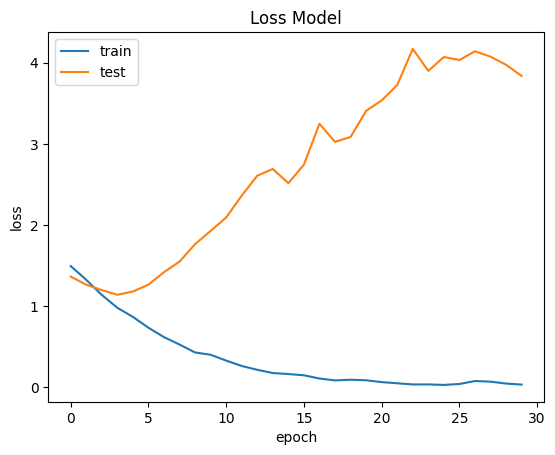

In [34]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()